<a href="https://colab.research.google.com/github/shrutz510/NodeJS/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount(('/content/gdrive'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd "/content/gdrive/My Drive/Face_Recognition"

/content/gdrive/My Drive/Face_Recognition


In [3]:
!pwd

/content/gdrive/My Drive/Face_Recognition


In [4]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 72kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=eb4656ae5c3b3166d73fed7ee8380fb1e3dabe3ae8969ebfcb8d806354407b4a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Initialisation



In [5]:
[]

[]

Hog Features

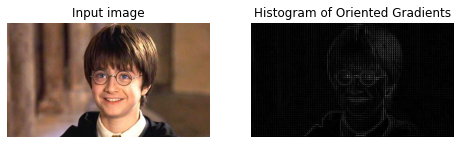

In [6]:
#using hog
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2 #OpenCV

#get image from drive 
#convert to grayscale
image = cv2.imread('Harry1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#fd is feature detector
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

#histogram rescaled for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [7]:
len(fd)

56448

In [8]:
image.shape

(1012, 1800, 3)

Face Detection

In [9]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

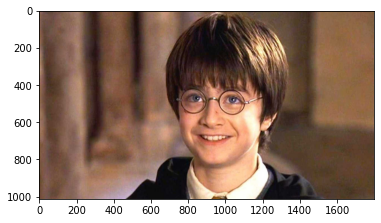

In [10]:
#load image onto numpy
image = cv2.imread('Harry1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [11]:
#find all faces using sliding window classifier
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image." .format(number_of_faces))

Found 1 face(s) in input image.


A face is located at position Top: 348, Right: 1170, Bottom: 811, Left: 707


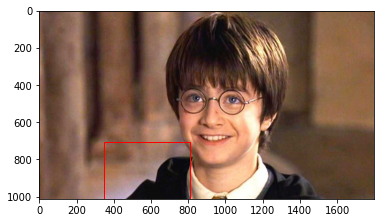

In [12]:
#get axis handle
plt.imshow(image)
ax = plt.gca()

#loop for all faces
for face_location in face_locations:

  #print location for each face (top, right, bottom, left)
  top, right, bottom, left = face_location
  x, y, z, w = top, right, bottom, left
  print ("A face is located at position Top: {}, Right: {}, Bottom: {}, Left: {}".format(x,y,z,w))
  rect = Rectangle((x, y), z-x, w-y, fill=False, color='red')
  ax.add_patch(rect)

#show image
plt.show()

Face Recognition 

In [13]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [14]:
#Create database
image = cv2.imread('Harry_Her.jpeg')
demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('Harry1.jpg')
harry = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('Hermione.jpg')
herm = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [19]:
#Face encoding

demo_encodings = face_recognition.face_encodings(demo)[0]
harry_encodings = face_recognition.face_encodings(harry)[0]
herm_encodings = face_recognition.face_encodings(herm)[0]

known_encodings = [
    demo_encodings,
    harry_encodings,
    herm_encodings
]

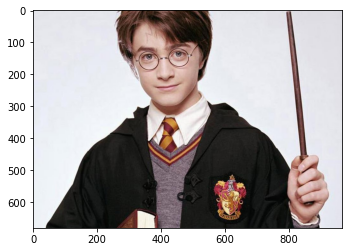

In [20]:
#Load image to check
image = cv2.imread('Harry2.jpg')
unknown = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

unknown_encodings = face_recognition.face_encodings(unknown)

In [23]:
from scipy.spatial import distance
for unknown_encoding in unknown_encodings:

  #euclidean distance
  results = []
  for known_encoding in known_encodings:
    d = distance.euclidean(known_encoding, unknown_encoding)
    results.append(d)
  
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if results[0]:
    name = "demo"
  elif results[1]:
    name = "Harry"
  elif results[2]:
    name = "Hermione"
  
  print (f"Found {name} in the photo")

Found Harry in the photo


Facial Landmarks

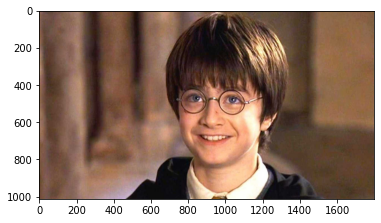

In [24]:
#load file into numpy
image = cv2.imread('Harry1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [26]:
#find all facial images
face_landmarks_list = face_recognition.face_landmarks(image)

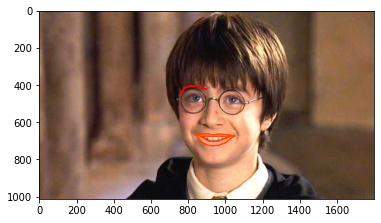

In [32]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x, y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color='red')
    ax.add_line(l)
    pre_x, pre_y = x, y

  right_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = right_eyebrow_pts[0]
  for (x, y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color='red')
    ax.add_line(l)
    pre_x, pre_y = x, y

    p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)

plt.show()